# Pre-Processing

In [6]:
#Transforming data to integer
data=df1
data["Diabetes"] = data["Diabetes"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249049 entries, 0 to 249048
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes              249049 non-null  int32
 1   HighBP                249049 non-null  int32
 2   HighChol              249049 non-null  int32
 3   CholCheck             249049 non-null  int32
 4   BMI                   249049 non-null  int32
 5   Smoker                249049 non-null  int32
 6   Stroke                249049 non-null  int32
 7   HeartDiseaseorAttack  249049 non-null  int32
 8   PhysActivity          249049 non-null  int32
 9   Fruits                249049 non-null  int32
 10  Veggies               249049 non-null  int32
 11  HvyAlcoholConsump     249049 non-null  int32
 12  AnyHealthcare         249049 non-null  int64
 13  NoDocbcCost           249049 non-null  int64
 14  GenHlth               249049 non-null  int32
 15  MentHlth              249049 non-n

In [8]:
#Check null values
data.isnull().sum()

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
#Checking unique values in different variables
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


,unique value count
Diabetes,2
HighBP,2
HighChol,2
CholCheck,2
BMI,83
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [10]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")
v_counts(data)

0    213703
1     35346
Name: Diabetes, dtype: int64
_____________________________________________________________________________
0    143133
1    105916
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    144333
1    104716
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    239641
0      9408
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24180
26    20277
24    19318
25    16911
28    16253
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 83, dtype: int64
_____________________________________________________________________________
0    138908
1    110141
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    239022
1     10027
Name: Stroke, dtype: int64
___________________________________________________

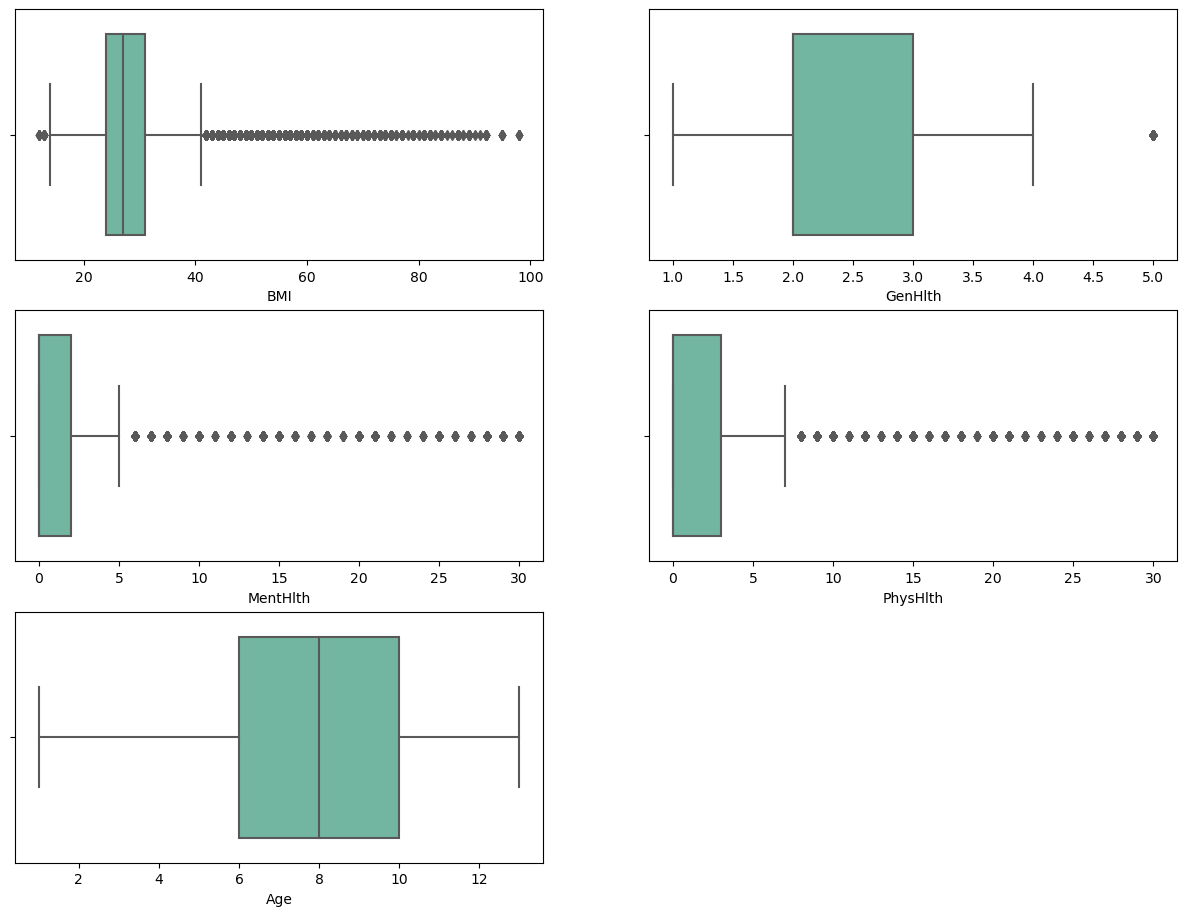

In [11]:
#Check the Outliers:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

There is no outliers in the data

In [12]:
#Check and drop dublicated data
data.duplicated().sum()

23897

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.duplicated().sum()

0

In [15]:
data.shape

(225152, 22)

# Feature Selection

<Axes: title={'center': 'Correlation with Diabetes'}>

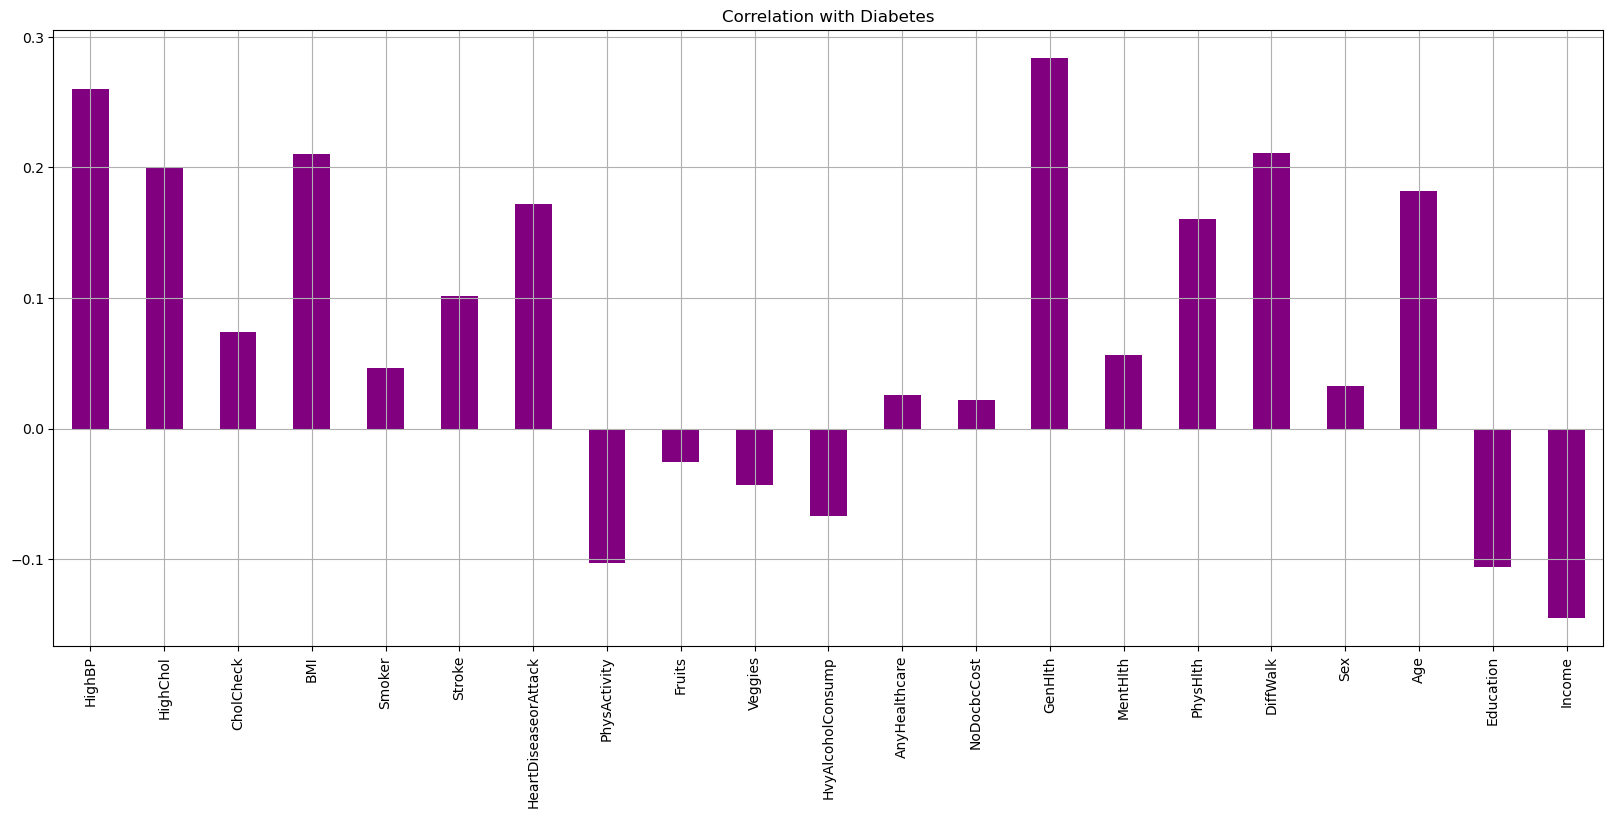

In [16]:
#With Correlation
data.drop('Diabetes', axis=1).corrwith(data.Diabetes).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes",color="Purple")

Diabetes_binary's relation with other columns Through bar Graph Result:

1. Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2. HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , MentHlth , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_binary

In [17]:
#!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [18]:
Orginal_data=data
print(Orginal_data.dtypes)
#data.drop("Diabetes_binary_str" , axis= 1 ,inplace=True)
# Convert non-numeric values to numeric (assuming Orginal_data is a DataFrame)
Orginal_data = Orginal_data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values, if any
Orginal_data = Orginal_data.dropna()

Diabetes                int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object


In [19]:

#VIF Test
def calc_VIF(x):
    vif= pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)


X = add_constant(Orginal_data)  
ds=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)  
print(ds)

const                   109.246041
Diabetes                  1.193076
HighBP                    1.316291
HighChol                  1.167152
CholCheck                 1.036022
BMI                       1.142538
Smoker                    1.076225
Stroke                    1.078532
HeartDiseaseorAttack      1.171215
PhysActivity              1.131210
Fruits                    1.097894
Veggies                   1.098130
HvyAlcoholConsump         1.027913
AnyHealthcare             1.109349
NoDocbcCost               1.133354
GenHlth                   1.740336
MentHlth                  1.219079
PhysHlth                  1.593227
DiffWalk                  1.514526
Sex                       1.076777
Age                       1.359592
Education                 1.271302
Income                    1.430251
dtype: float64


In [20]:
#ANOVA Test

X = Orginal_data.iloc[:,1:]
Y = Orginal_data.iloc[:,0]

# ANOVA feature selection for numeric input and categorical output


# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(225152, 10)


In [21]:
pd.DataFrame(X_selected).head(3)

,0,1,2,3,4,5,6,7,8,9
0,1,1,40,0,5,15,1,9,4,3
1,0,0,25,0,3,0,0,7,6,1
2,1,1,28,0,5,30,1,9,4,8


In [22]:
#Chi Square
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               

# feature scores
f_Scores.columns = ['Feature','Score']

f_Scores

,Feature,Score
0,HighBP,8382.751326
1,HighChol,5081.279502
2,CholCheck,50.577013
3,BMI,16004.776305
4,Smoker,261.785513
5,Stroke,2208.260843
6,HeartDiseaseorAttack,5989.587765
7,PhysActivity,635.704390
8,Fruits,56.803505
9,Veggies,85.490408


In [23]:
print(f_Scores.nlargest(16,'Score'))

                 Feature          Score
15              PhysHlth  101616.733104
3                    BMI   16004.776305
14              MentHlth   12152.173121
18                   Age    8843.829911
0                 HighBP    8382.751326
16              DiffWalk    8177.773487
13               GenHlth    7910.818149
6   HeartDiseaseorAttack    5989.587765
1               HighChol    5081.279502
20                Income    3508.169633
5                 Stroke    2208.260843
10     HvyAlcoholConsump     949.239117
7           PhysActivity     635.704390
19             Education     500.002168
4                 Smoker     261.785513
17                   Sex     136.953745


The 'Veggies' variable will not be with us anymore in the analysis because of the lower f1 score

In [24]:
#Dropping undesired columns
undesired_column  = ["Fruits" , "Veggies" , "Sex" , "CholCheck" , "AnyHealthcare"]
data.drop(undesired_column , axis= 1 ,inplace=True)

In [25]:
data.head(5)

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,1,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,1,5,30,30,1,9,4,8
3,0,1,0,27,0,0,0,1,0,0,2,0,0,0,11,3,6
4,0,1,1,24,0,0,0,1,0,0,2,3,0,0,11,5,4


In [26]:
data['Diabetes'], categories = pd.factorize(data['Diabetes'])
#data['Sex_Encoded'], categories = pd.factorize(data['Sex'])
#data['HighChol_Encoded'], categories = pd.factorize(data['HighChol'])
data.head(3)
#data.drop('Diabetes_encoded' , axis= 1 ,inplace=True)

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0,1,1,40,1,0,0,0,0,0,5,18,15,1,9,4,3
1,0,0,0,25,1,0,0,1,0,1,3,0,0,0,7,6,1
2,0,1,1,28,0,0,0,0,0,1,5,30,30,1,9,4,8


# Data Splitting

In [27]:
X=data.drop("Diabetes",axis=1)
Y=data["Diabetes"]
Y.value_counts()

0    190055
1     35097
Name: Diabetes, dtype: int64

we balanced the data

In [28]:
#Dealing with Imbalance
#Y.value_counts()
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)
x_sm,y_sm= nm.fit_resample(X,Y)
y_sm.shape , x_sm.shape

((70194,), (70194, 16))

In [29]:
y_sm.value_counts()

0    35097
1    35097
Name: Diabetes, dtype: int64

In [30]:
#Train and test split
#set.seed(456)
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

# Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)